<a href="https://colab.research.google.com/github/Neiouo/Eric/blob/main/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80_%E4%BD%9C%E6%A5%AD%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
import pandas as pd
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ks57O79IHqgCVQZ2djk7Fy2kY8r7TOY-0EY-3CNgrUM/edit?gid=1874159743#gid=1874159743')

In [ ]:
from gspread_dataframe import set_with_dataframe
worksheet = gsheets.get_worksheet(0)
data = worksheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
df_sorted = df.sort_values(by='Discount (%)', ascending=True)

In [ ]:
df_sorted

,Game Name,Original Price (USD),Discount (%),Discounted Price (USD),Rating (%)
3,Game 4,40.65,0,40.65,57.5
6,Game 7,57.22,20,45.78,68.9
7,Game 8,13.83,20,11.06,70.3
0,Game 1,19.17,40,11.5,93
5,Game 6,41.66,50,20.83,54.4
9,Game 10,19.96,50,9.98,71.1
2,Game 3,29.98,60,11.99,97.5
8,Game 9,48.85,70,14.66,86.7
1,Game 2,11.22,80,2.24,53.5
4,Game 5,23.02,80,4.6,60.4


In [ ]:
df

,Game Name,Original Price (USD),Discount (%),Discounted Price (USD),Rating (%)
0,Game 1,19.17,40,11.5,93
1,Game 2,11.22,80,2.24,53.5
2,Game 3,29.98,60,11.99,97.5
3,Game 4,40.65,0,40.65,57.5
4,Game 5,23.02,80,4.6,60.4
5,Game 6,41.66,50,20.83,54.4
6,Game 7,57.22,20,45.78,68.9
7,Game 8,13.83,20,11.06,70.3
8,Game 9,48.85,70,14.66,86.7
9,Game 10,19.96,50,9.98,71.1


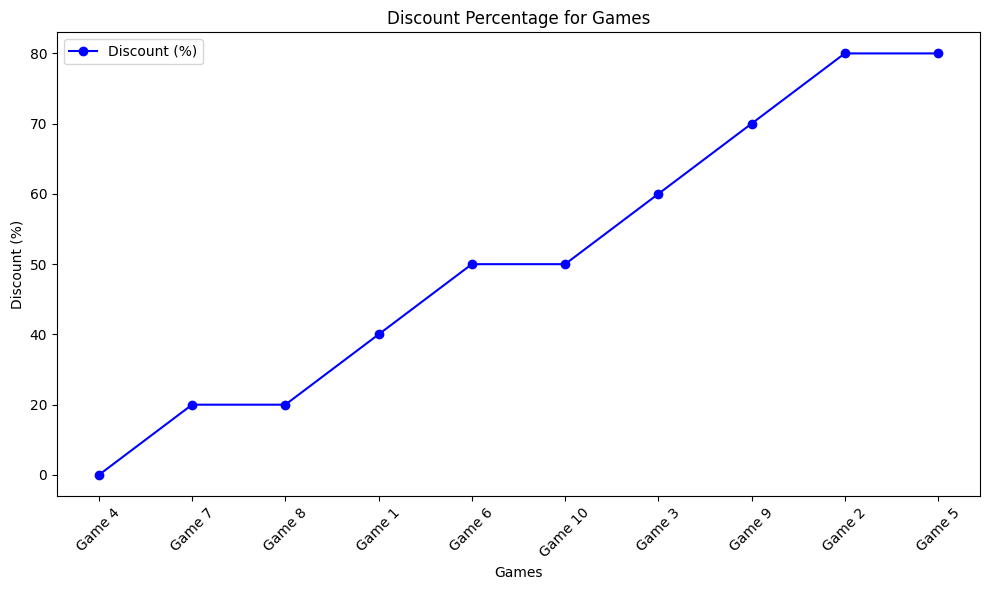

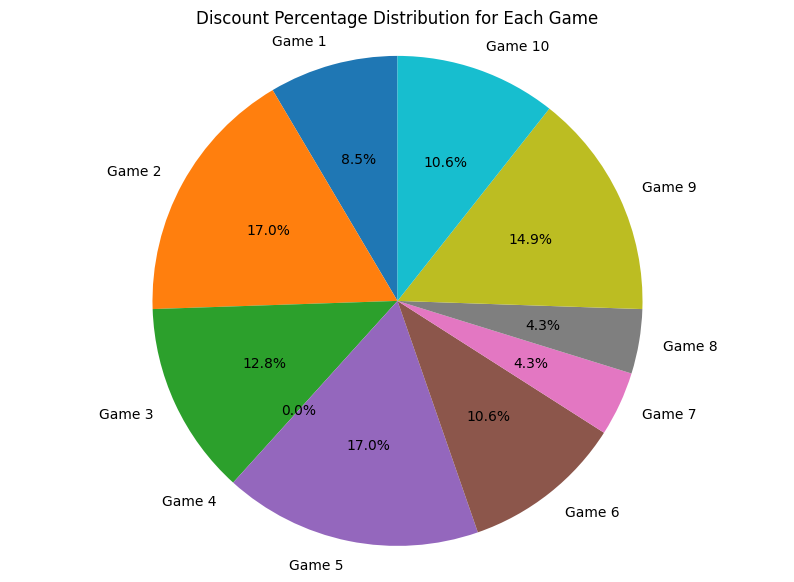

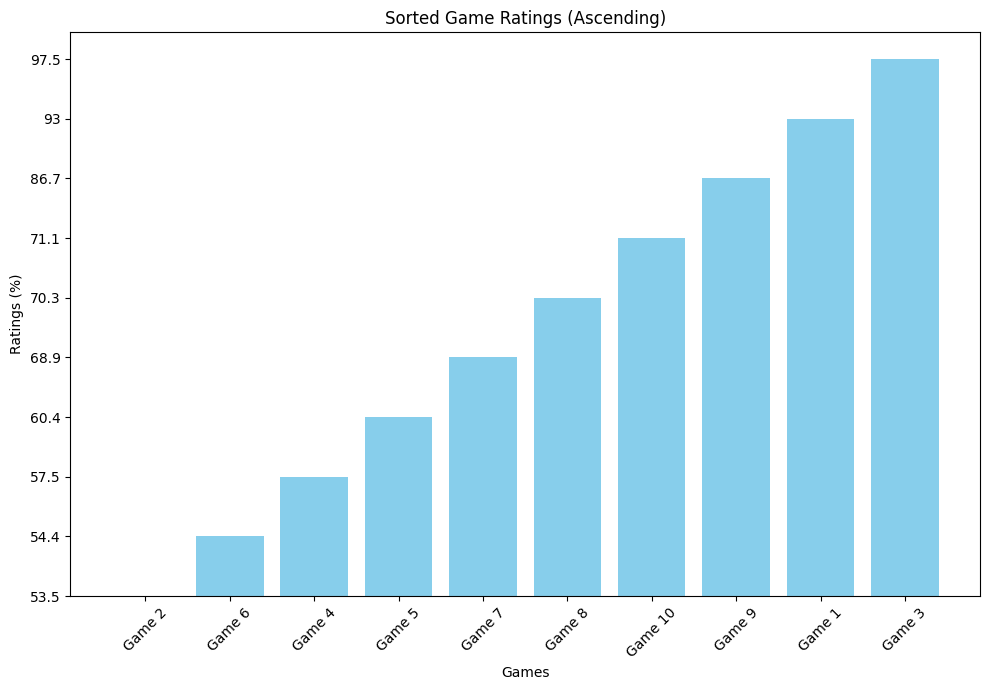

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df_sorted = df.sort_values(by='Discount (%)', ascending=True)
# Line chart: Sorted Original Price vs Discounted Price
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Discount (%) as a line chart
ax.plot(df_sorted['Game Name'], df_sorted['Discount (%)'], marker='o', color='b', label='Discount (%)')

# Add labels and title
ax.set_xlabel('Games')
ax.set_ylabel('Discount (%)')
ax.set_title('Discount Percentage for Games')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

df_sorted = df.sort_values(by=['Rating (%)'])

# Pie chart: Discount Percentage Distribution
plt.figure(figsize=(10, 7))
plt.pie(df['Discount (%)'], labels=df['Game Name'], autopct='%1.1f%%', startangle=90)
plt.title('Discount Percentage Distribution for Each Game')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Bar chart: Sorted Game Ratings (ascending)
plt.figure(figsize=(10, 7))
plt.bar(df_sorted['Game Name'], df_sorted['Rating (%)'], color='skyblue')
plt.xlabel('Games')
plt.ylabel('Ratings (%)')
plt.title('Sorted Game Ratings (Ascending)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#圖表說明
#圖表一 : 依照特價%數遞增的摺線圖
#圖表二 : 依照特價%數遞增的圓餅圖
#圖表三 : 依照評價%數遞增的長條圖
#圖表四 : 依照特價%與評價%的關係圖
#圖表五 : 折價後價格的圖
#圖表六 : 特價%與特價後價格的關係圖

<ipython-input-72-f5b05a8b38e7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Game Name', y='Discounted Price (USD)', data=df, palette="viridis")


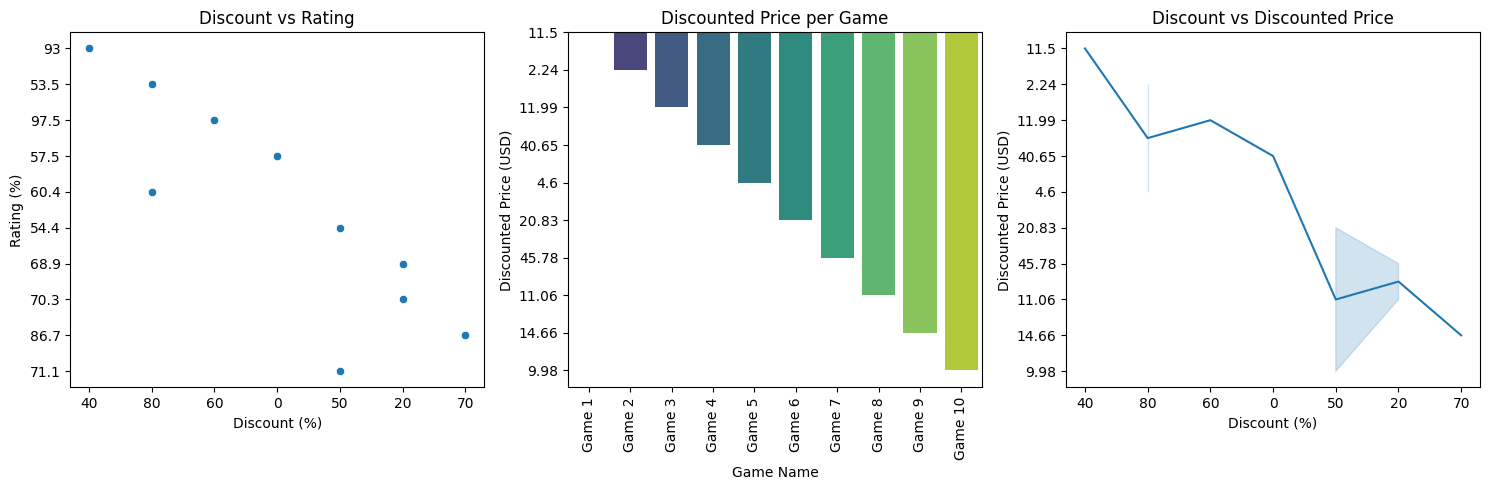

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']  # Using a commonly available font
matplotlib.rcParams['axes.unicode_minus'] = False  # To avoid issues with negative signs

plt.figure(figsize=(15, 5))

# Scatter plot: Discount (%) vs Rating (%)
plt.subplot(1, 3, 1)
sns.scatterplot(x='Discount (%)', y='Rating (%)', data=df)
plt.title('Discount vs Rating')

# Bar plot: Discounted Price (USD) for each Game
plt.subplot(1, 3, 2)
sns.barplot(x='Game Name', y='Discounted Price (USD)', data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title('Discounted Price per Game')

# Line plot: Discount (%) vs Discounted Price (USD)
plt.subplot(1, 3, 3)
sns.lineplot(x='Discount (%)', y='Discounted Price (USD)', data=df)
plt.title('Discount vs Discounted Price')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

以下為老師的範例

In [ ]:
Breakfast = df[df['Meal'] == 'Breakfast']

In [ ]:
Lunch = df[df['Meal'] == 'Lunch']
Dinner = df[df['Meal'] == 'Dinner']

In [ ]:
bc = Breakfast['Calories']

In [ ]:
lc = Lunch['Calories']
dc = Dinner['Calories']

In [ ]:
bc_reset = bc.reset_index(drop=True)
lc_reset = lc.reset_index(drop=True)
dc_reset = dc.reset_index(drop=True)

In [ ]:
df_c = pd.DataFrame({'Breakfast' : bc_reset, 'Lunch' : lc_reset, 'Dinner' : dc_reset})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

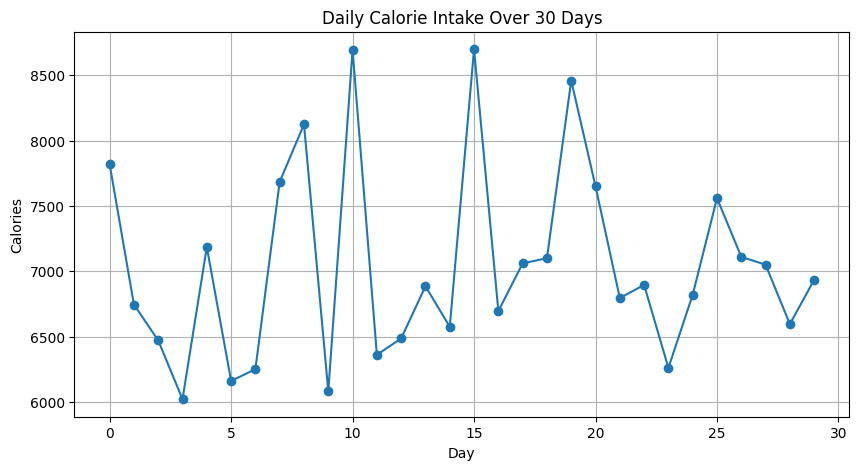

In [ ]:
# 1. 每日總卡路里折線圖
df_c["Total"] = df_c.sum(axis=1)
plt.figure(figsize=(10, 5))
plt.plot(df_c["Total"], marker='o', linestyle='-')
plt.xlabel("Day")
plt.ylabel("Calories")
plt.title("Daily Calorie Intake Over 30 Days")
plt.grid()
plt.show()

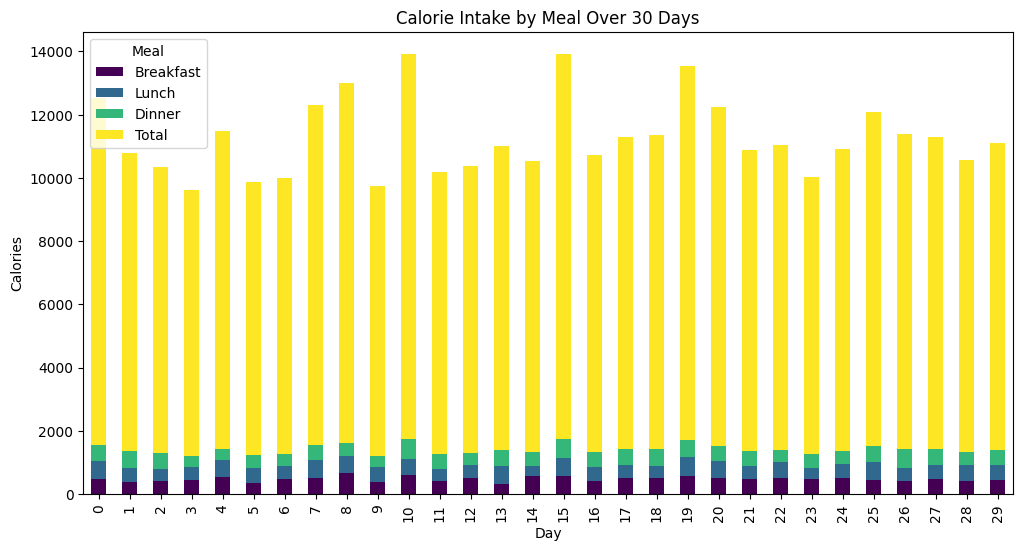

In [ ]:
# 2. 三餐卡路里攝取量的堆疊長條圖
df_c.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Day")
plt.ylabel("Calories")
plt.title("Calorie Intake by Meal Over 30 Days")
plt.legend(title="Meal")
plt.show()

Enter the day (0-29): 18


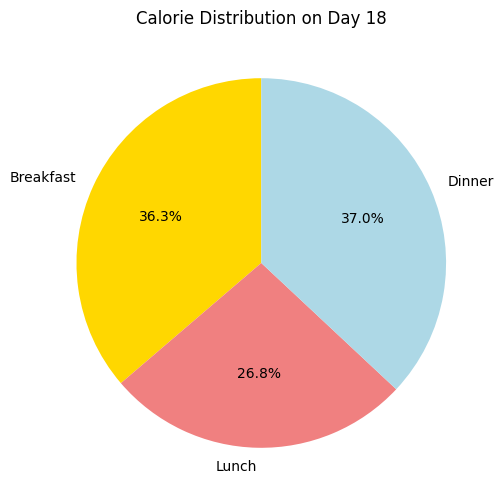

In [ ]:
# 3. 使用者輸入天數的圓餅圖
day = int(input("Enter the day (0-29): "))  # 使用者輸入
plt.figure(figsize=(6, 6))
df_c.loc[day, ["Breakfast", "Lunch", "Dinner"]].plot.pie(autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightblue'])
plt.title(f"Calorie Distribution on Day {day}")
plt.ylabel("")  # 移除 y-label
plt.show()


請輸入數字 (-1: 折線圖, -2: 堆疊長條圖, 1-30: 圓餅圖): -2


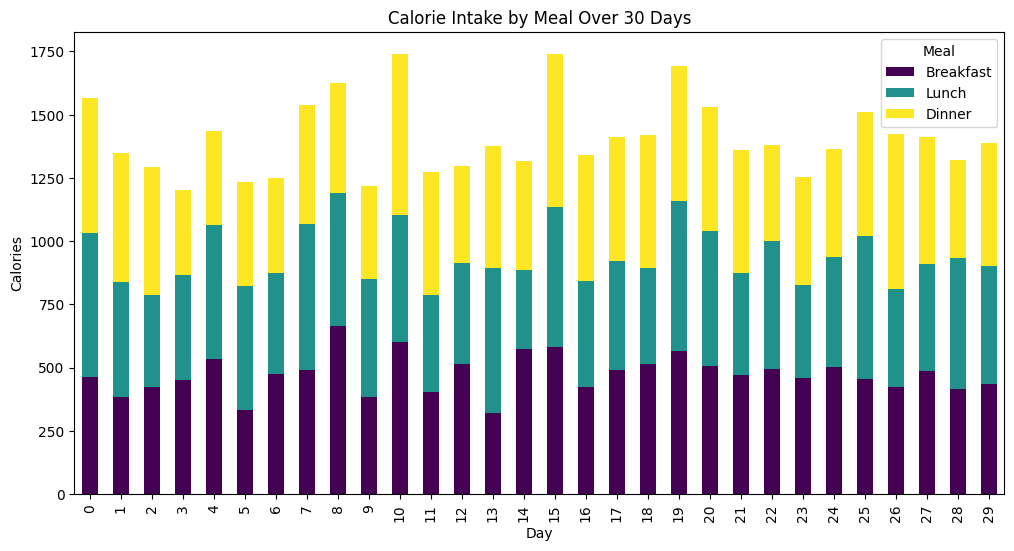

In [ ]:
# 確保 df_c 已經載入並且包含需要的欄位
df_c["Total"] = df_c.sum(axis=1)  # 計算每日總卡路里攝取量

# 使用者輸入數字
user_input = int(input("請輸入數字 (-1: 折線圖, -2: 堆疊長條圖, 1-30: 圓餅圖): "))

if user_input == -1:
    # 生成每日總卡路里折線圖 (001.jpg)
    plt.figure(figsize=(10, 5))
    plt.plot(df_c["Total"], marker='o', linestyle='-')
    plt.xlabel("Day")
    plt.ylabel("Calories")
    plt.title("Daily Calorie Intake Over 30 Days")
    plt.grid()
    plt.savefig("001.jpg")  # 儲存圖片
    plt.show()

elif user_input == -2:
    # 生成三餐卡路里攝取量堆疊長條圖 (002.jpg)
    df_c[["Breakfast", "Lunch", "Dinner"]].plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
    plt.xlabel("Day")
    plt.ylabel("Calories")
    plt.title("Calorie Intake by Meal Over 30 Days")
    plt.legend(title="Meal")
    plt.savefig("002.jpg")  # 儲存圖片
    plt.show()

elif 1 <= user_input <= 30:
    # 生成某一天的三餐卡路里圓餅圖 (003.jpg)
    day = user_input - 1  # 轉換為索引 (0-based index)
    plt.figure(figsize=(6, 6))
    df_c.loc[day, ["Breakfast", "Lunch", "Dinner"]].plot.pie(
        autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightblue']
    )
    plt.title(f"Calorie Distribution on Day {user_input}")
    plt.ylabel("")  # 移除 y-label
    plt.savefig("003.jpg")  # 儲存圖片
    plt.show()

else:
    print("無效輸入，請輸入 -1、-2 或 1 到 30 之間的數字。")